# Exercises 4.2: logistic regression

### PA Women in Tech: Intro to Data Science with Python

In these exercises we will look at creating a **logistic regression model** using the dataset that we explored in exercises 4.1. We will:
- create a test and train split
- standardise the input features
- create a logistic regression model
- evaluate the model

First, we import pandas and seaborn libraries and necessary sklearn objects and load the dataset into a pandas dataframe. We'll also take a look at the first five lines.

In [1]:
import seaborn as sns
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
df_heart = pd.read_csv("heart.csv")
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Training a logistic regression model

Logistic regression is a supervised machine learning process, where we try to classify a value. Logistic regression is used when your `y` variable can take only two values.

Let's now begin to train our regression model! We will need to first split up our data into an `X` array that contains the features to train on, and a `y` array with the target variable, in this case the `output` column.

1. Define the features `X` (the input features) and label `y` (the output feature)

Hint: you can use the dataframe method `drop` with the `columns` keyword argument to remove a column from a dataframe

In [3]:
X = df_heart.drop(columns = ['output'])
y = df_heart['output']

In [4]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


## Train test split

Next, we'll split the data into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model.

2. Generate the test and train datasets from your `X` and `y` data, with 20% of the data for testing

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)


print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [6]:
y_test

204    0
159    1
219    0
174    0
184    0
      ..
0      1
288    0
259    0
179    0
110    1
Name: output, Length: 61, dtype: int64

## Standardising input data

3. Standardise all the input features

In [7]:
scaler = StandardScaler() # we have instiated the object
scaler = scaler.fit(X_train) # fit the scaler to our model, X

data_standardised_train = scaler.transform(X_train)
data_standardised_train

array([[-0.27090572,  0.6636838 ,  1.9766492 , ..., -0.66896473,
        -0.72428597, -2.11701865],
       [ 1.3708101 , -1.50674161,  0.99843017, ...,  0.96628239,
         0.27160724, -0.47497213],
       [ 0.27633288,  0.6636838 ,  0.99843017, ...,  0.96628239,
         0.27160724,  1.16707438],
       ...,
       [-2.78820331,  0.6636838 ,  0.02021114, ...,  0.96628239,
        -0.72428597, -0.47497213],
       [-0.38035344,  0.6636838 , -0.95800789, ...,  0.96628239,
        -0.72428597,  1.16707438],
       [-0.05201028,  0.6636838 ,  0.99843017, ...,  0.96628239,
        -0.72428597,  1.16707438]])

In [9]:
scaler = scaler.fit(X_test) # fit the scaler to our model, X

data_standardised_test = scaler.transform(X_test)
data_standardised_test

array([[ 0.9194768 , -1.33143805, -0.86574938,  1.52235455, -1.5417599 ,
        -0.41602515, -0.92493962, -0.25525849, -0.75106762,  3.69304024,
        -2.16628237,  2.0851727 ,  0.96629063],
       [ 0.23547577,  0.75106762,  0.07729905, -0.14385886, -0.46790189,
        -0.41602515, -0.92493962,  0.64018504, -0.75106762, -0.80087166,
         1.01789171, -0.67994762,  0.96629063],
       [-0.67652561,  0.75106762, -0.86574938, -0.14385886,  0.1914846 ,
         2.40370085, -0.92493962, -0.00652418,  1.33143805, -0.80087166,
         1.01789171,  1.16346593,  0.96629063],
       [ 0.69147646,  0.75106762, -0.86574938, -0.14385886, -0.75049611,
        -0.41602515, -0.92493962, -0.90196771,  1.33143805,  0.93870714,
        -0.57419533,  1.16346593,  0.96629063],
       [-0.44852527,  0.75106762, -0.86574938,  0.96695008, -0.05343038,
        -0.41602515, -0.92493962, -1.10095516, -0.75106762,  1.08367204,
        -0.57419533, -0.67994762,  0.96629063],
       [ 1.03347698,  0.751067

## Creating and training the model

4a. Initalise the logistic regression model

In [10]:
lm = LogisticRegression()

4b. Train the model with your training data

In [12]:
lm.fit(data_standardised_train, y_train)

LogisticRegression()

## Model prediction

5. Get the predictions of your model for the test data

In [13]:
predictions = lm.predict(data_standardised_test)

## Model evaluation

6a. Display the model score. What does this result mean?

In [14]:
print(lm.score(data_standardised_test, y_test))

0.7540983606557377


Note:
    
model. score automates the prediction of your data using X_test and compares it with Y_test and by 
default uses the R-squared metric to so (hence don't need to manually derive y_pred ).

what is the good score for a model?
A higher model score generally indicates better performance, with 1 being the best possible score and 0 being the worst.

6b. Plot a confusion matrix for your model and interpret the results. What implications might your model performance have?

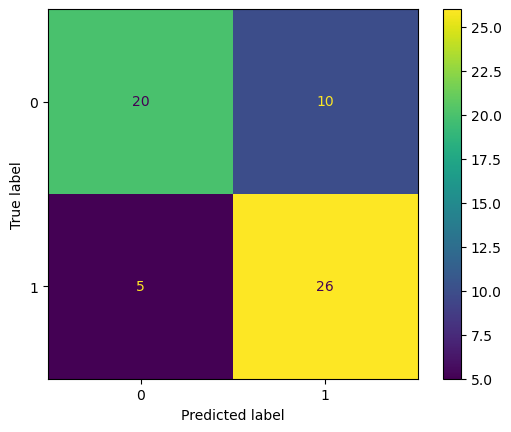

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()


In [35]:
# 
(20+26)/(20+5+26+10)

0.7540983606557377

In [36]:
#(TP+TN)/(TP+FN+TN+FP)
# false positive
10/(20+5+26+10)

0.16393442622950818